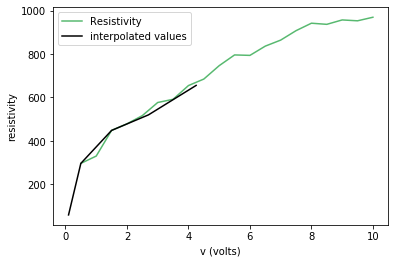

These are the interpolated values
 [59.29462365591399, 296.4731182795699, 448.35483870967744, 519.9684407176065, 655.5290165001309]


In [45]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


####### TASK 1 ##############
 
path = "/Users/Alexander/Documents/MSP/PRA1500 Tools for Practical Physics/Session 3 - Calibration Curves and Transformation of Variables/voltage current and r hold data.csv"

def Resistivity(path,index=None):
    
    ### Read the csv
    light_bulb_data = pd.read_csv(path)
    
    ### Runs the code below for a specific user defined variable, 'index'
    if (index!=None):
        
        ### Getting the data
        V = light_bulb_data['v (volts)'].values[index] #Voltage
        
        A = light_bulb_data['a (amps)'].values[index] #Amps
        
        R = light_bulb_data['r_hold (ohms)'].values[index] #Resistance of light bulb

        ### Calculate the resistivity using the equation below     
        resistivity = (5.65*((V/A)-R))/0.93
        
        string = "For "+str(V)+" volts, the resistivity is: " + str(resistivity)
        
        print(string)
    
    ### Runs the code below for a list of voltages
    else:
        
        V = light_bulb_data['v (volts)'].values
        
        A = light_bulb_data['a (amps)'].values #Amps
    
        R = light_bulb_data['r_hold (ohms)'].values #Resistance of light bulb
        
        resistivity = []
        
        for i in range(len(V)):
                              
            resistivity.append(5.65*((V[i]/A[i])-R[i])/0.93)
        
        return V,resistivity
function = Resistivity(path)


def Interpolate(function):
    
    ### Array that will be used to create the lookup table
    new_V = [0.1,0.5,1.5,2.7,4.25]
    new_ro = []
    
    new_ro.append(0 + (new_V[0] - 0) * ((function[1][0]-0)/(function[0][0])-0))
    
    for i in range(len(function[0])):
        for j in range(len(new_V)):
            if (new_V[j] < function[0][i]) and (new_V[j] > function[0][i-1]):
                
                new_ro.append(function[1][i-1] + (new_V[j] - function[0][i-1]) * ((function[1][i]-function[1][i-1])/(function[0][i])-function[0][i-1]))
                
            elif (new_V[j] == function[0][i]):
                
                new_ro.append(function[1][i])
    
    return new_ro, new_V

### Checking if index was given
try: 
    
    x = function[0]
    y = function[1]
    
    new_x = Interpolate(function)[1]
    new_y = Interpolate(function)[0]
    
    
#     x = np.array(x)
#     y = np.array(y)
    
    #xnew = np.linspace(x.min(),x.max(),300)
    
#     f = interp1d(x, y)
    
#     line1d = plt.plot(x,f)
#     x_values = line1d[0].get_xdata()
#     y_values = line1d[0].get_ydata()
    
#     idx = np.where(x_values == x_values[-2])
#     y_values[idx]
#     x_y = line1d[0].get_xydata()
#     xy[-2]
    
    
    ### Plotting the graph
    plt.plot(x, y, color='#58b970', label='Resistivity')
    plt.plot(new_x, new_y,color = '#000000', label='interpolated values')

    plt.xlabel("v (volts)")
    plt.ylabel("resistivity")
    plt.legend()
    plt.show()
    
    print("These are the interpolated values\n",Interpolate(function)[0])
    
except:
    
    function
    


In [ ]:
### We reused the code from week 1 task 2

path = ""


def Least_Squares_Analysis(path,dependant,independant,lower,upper):
    
    covid_data = pd.read_csv(path)
        
    # Setting the x and y arrays and getting rid of the first 20 data points
    y = covid_data[dependant].values[lower:upper]
    x = covid_data[independant].values[lower:upper]
    
    # Calculating their mean
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    n = len(x)
    
    numerator = 0
    denomenator = 0
    #Calculating the gradient and the y-interept
    for i in range(n):
        numerator += (x[i] - x_mean) * (y[i] - y_mean)
        denomenator += (x[i] - x_mean)**2
        m = numerator / denomenator
        c = y_mean - (m * x_mean)
    
    max_x = np.max(x) + 10
    min_x = np.min(x) - 10
    
    lin = np.linspace(min_x,max_x,1000)
    curve = m * lin + c
    
    # Calculating Root Mean Squares Error
    rmse = 0
    for i in range(n):
        y_pred = c + m * x[i]
        rmse += (y[i] - y_pred) ** 2
    rmse = np.sqrt(rmse/n)
    
    # Calculating R^2 Score
    ss_tot = 0
    ss_res = 0
    for i in range(n):
        y_pred = c + m * x[i]
        ss_tot += (y[i] - y_mean) ** 2
        ss_res += (y[i] - y_pred) ** 2
    r2 = 1 - (ss_res/ss_tot)
    
    # Calculating the error for the gradient and y-intercept
    s = np.sqrt((ss_tot-m*numerator)/(n-2))
    error_gradient = s/np.sqrt(denomenator)
    error_intercept = s*np.sqrt((1/n) + (x_mean**2)/denomenator)

    
    return lin,curve,x,y,rmse,r2,m,c,error_gradient,error_intercept
    

# independant = input("What's the column name for the independant variable? ")
# dependant = input("What's the column name for the dependant variable? ")
# lower_limit = int(input("From which index do you want to start the regression? "))
# upper_limit = int(input("Which index do you want the regression to finish on? "))
independant = "v (volts)"
dependant = "a (amps)"
lower_limit = 0
upper_limit = 20

# Ploting Line
x,y,X,Y,rmse,r2,m,c,error_m,error_c = Least_Squares_Analysis(path,dependant,independant,lower_limit,upper_limit)


plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel(independant)
plt.ylabel(dependant)
plt.legend()
plt.show()
print("Root Mean Square Error: ",rmse)
print("R squared: ",r2)
print("Gradient: ",m)
print("y-intercept: ",c)
print("The error in the gradient is ",error_m)
print("The error in the y-intercept is ",error_c)
print("The percentage error in the gradient is ",(error_m/m)*100)
if (c < 0):
    print("The percentage error in the y-intercept is ",(error_c/c)*-100)
else:
    print("The percentage error in the y-intercept is ",(error_c/c)*100)